In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('../Data/cleaned_data.csv')

In [3]:
dataset.head()

,productTitle,title_length,originalPrice,price,sold,tagText,has_free_shipping,price_bin,discount_pct
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,127,110.618189,46.79,600,Free shipping,1,<50,0.58
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,127,352.819724,169.72,0,Free shipping,1,100-200,0.52
2,Desser For Bedroom With 7 Fabric Drawers Organ...,124,78.400000,39.46,7,Free shipping,1,<50,0.50
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",128,239.077801,111.99,0,Free shipping,1,100-200,0.53
4,Small Unit Simple Computer Desk Household Wood...,121,48.820000,21.37,1,Free shipping,1,<50,0.56


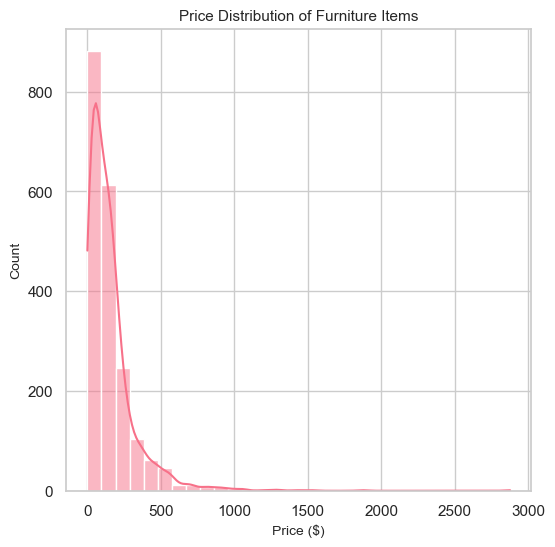

In [4]:
# # ploting chart for analysing distribution of price

sns.set_theme(style="whitegrid")  # Other options: "darkgrid", "white", "ticks"
sns.set_palette("husl")

fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(dataset['price'], bins=30, kde=True, ax=ax)
ax.set_title('Price Distribution of Furniture Items', fontsize=11)
ax.set_xlabel('Price ($)', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

plt.show()
# plt.savefig('reports/eda_figures/price_distribution.png', dpi=300, bbox_inches='tight')

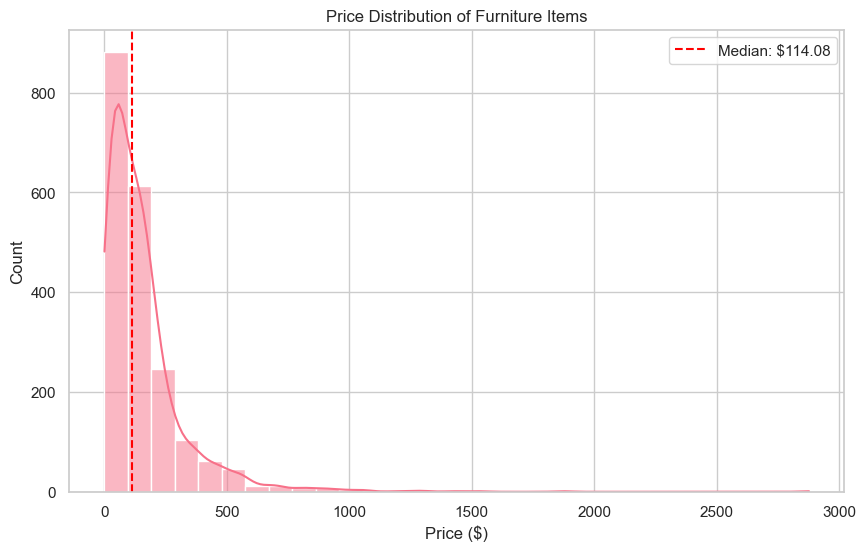

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['price'], bins=30, kde=True)
plt.title('Price Distribution of Furniture Items')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.axvline(dataset['price'].median(), color='red', linestyle='--', label=f'Median: ${dataset["price"].median():.2f}')
plt.legend()
plt.show()

### A right-skewed distribution indicates more budget-friendly items
### Identifies natural price points where products concentrate

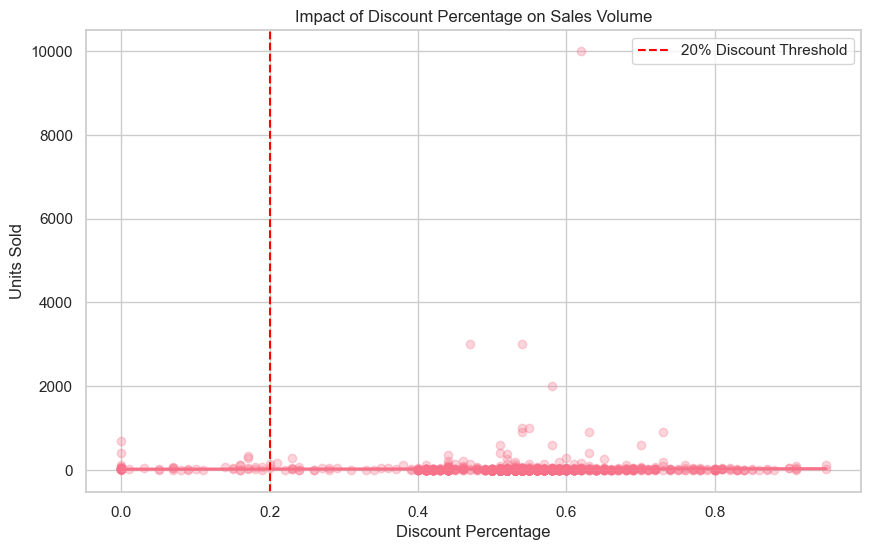

In [13]:
# Price elasticity analysis
plt.figure(figsize=(10, 6))
sns.regplot(x='discount_pct', y='sold', data=dataset, scatter_kws={'alpha':0.3})
plt.title('Impact of Discount Percentage on Sales Volume')
plt.xlabel('Discount Percentage')
plt.ylabel('Units Sold')
plt.axvline(x=0.2, color='red', linestyle='--', label='20% Discount Threshold')
plt.legend()
plt.show()

#### the regression line slopes flattens after 20%, deeper discounts may not significantly boost sales further.

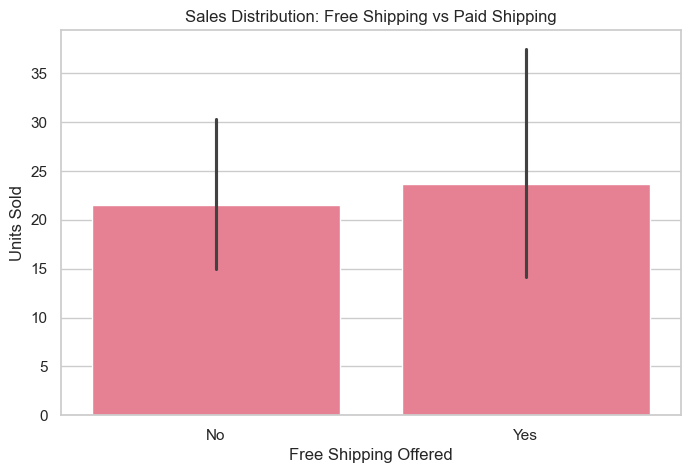

In [21]:
# Analyze whether free shipping boosts sales

#shipping_impact = dataset.groupby('has_free_shipping').agg({'sold': ['mean', 'count'], 'price': 'median'})

plt.figure(figsize=(8, 5))
sns.barplot(x='has_free_shipping', y='sold', data=dataset)
plt.title('Sales Distribution: Free Shipping vs Paid Shipping')
plt.xlabel('Free Shipping Offered')
plt.ylabel('Units Sold')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

#### median sales are higher for free shipping, it’s a strong incentive for customers

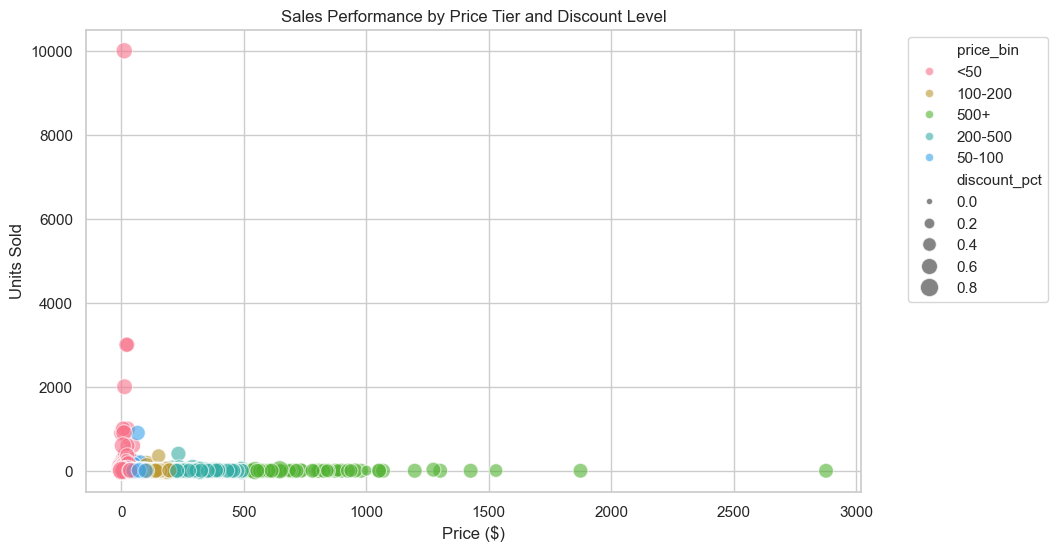

In [22]:
## Understand which price ranges (<$50, $50-100, etc.) perform best

price_tier_analysis = dataset.groupby('price_bin').agg({'sold': ['sum', 'median', 'count'], 'discount_pct': 'mean'}).sort_values(('sold', 'sum'), ascending=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sold', hue='price_bin', size='discount_pct', sizes=(20, 200), alpha=0.6, data=dataset)
plt.title('Sales Performance by Price Tier and Discount Level')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()